# Manipulação de dados em Pandas<a id='home'></a>

Arquivos Necessários = `dogs.csv`; `WEOOct2021all.xls`

Neste notebook vamos relembrar alguns alguns conceitos básicos de pandas e vamos resolver problemas quando lidar com dados mais complexos. Frequentemente nos encontramos com dados em que a unidade de observação é complexa. O Pandas nos ajuda a lidar com isso permitindo muitas variáveis de índice.

Alguns exemplos que podem usar um multiIndex:

* Estado e país
* Equipe e jogador
* Indústria e empresa
* País (ou pessoa, empresa,...), tempo...

Essa última é importante, e que aparece muito na economia. Chamamos isso de **painel de dados** ou, às vezes, de dados "longitudinais". Nossos dados são um painel quando temos observações da mesma empresa/pessoa/país ao longo do tempo.

Segue um resumo deste notebook:

1. [Indexação múltipla](#multi)


2. [Painel de Dados](#painel)

In [25]:
import pandas as pd             
import datetime as dt           
import matplotlib.pyplot as plt 

In [26]:
soccer = {'team' : ['Man City', 'Man City', 'Man City', 'Man City', 'Chelsea', 'Chelsea'], 
          'player' : ['Walker', 'Stones', 'Foden', 'Jesus', 'Cahill', 'Pedro'],
          'pos' : ['D', 'D', 'M', 'F', 'D', 'F'],
          'goals' : [1, 0, 0, 1, 0, 3],
          'assists': [0,0,0,0,0,0]
         }

prem = pd.DataFrame(soccer)
prem

,team,player,pos,goals,assists
0,Man City,Walker,D,1,0
1,Man City,Stones,D,0,0
2,Man City,Foden,M,0,0
3,Man City,Jesus,F,1,0
4,Chelsea,Cahill,D,0,0
5,Chelsea,Pedro,F,3,0


In [27]:
print(prem.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   team     6 non-null      object
 1   player   6 non-null      object
 2   pos      6 non-null      object
 3   goals    6 non-null      int64 
 4   assists  6 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 368.0+ bytes
None


## 1. Indexação múltipla [(topo)](#home)<a id='multi'></a>
A chave para trabalhar com conjuntos de dados mais complexos é obter o índice correto. Até agora, consideramos um único índice, mas pandas permite vários índices que se aninham.

**Conceito-chave:** a indexação hierárquica usa vários *níveis* de índices.

Vamos configurar o DataFrame para assumir a equipe e a posição como os índices.

In [28]:
prem.set_index(['team', 'pos'], inplace=True)
prem

player  goals  assists
team     pos                        
Man City D    Walker      1        0
         D    Stones      0        0
         M     Foden      0        0
         F     Jesus      1        0
Chelsea  D    Cahill      0        0
         F     Pedro      3        0

Observe que o método `set_index()` é o mesmo que usamos anteriormente com índices únicos. Neste caso, passamos uma lista de variáveis para tornar os índices
``` python
prem.set_index(['team', 'pos'], inplace=True)
```

Na saída, o nível mais alto do índice é 'team' (passamos 'team' primeiro na lista) e o segundo nível é posição. A saída não repete o nome da equipe para cada observação. O nome da equipe 'ausente' significa apenas que a equipe é a mesma da linha acima.

Qual é o nosso índice? Um novo tipo de objeto: o MultiIndex

In [29]:
print(prem.index)

MultiIndex([('Man City', 'D'),
            ('Man City', 'D'),
            ('Man City', 'M'),
            ('Man City', 'F'),
            ( 'Chelsea', 'D'),
            ( 'Chelsea', 'F')],
           names=['team', 'pos'])


### Subconjunto com vários índices
Com um índice múltiplo, precisamos de dois argumentos para fazer referência às observações

In [30]:
# All the defenders on Man City
prem.loc[('Man City', 'D'),:] 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


player  goals  assists
team     pos                        
Man City D    Walker      1        0
         D    Stones      0        0

Se o índice fosse grande, a falta de ordenação no indice poderia atrasar nosso programa. Vamos corrigir isso com `sort_index()`.

In [31]:
prem = prem.sort_index(axis=0)   # tell pandas which axis to sort. Could sort the columns, too...
                                 # returns a DataFrame unless we use inplace=True
prem

player  goals  assists
team     pos                        
Chelsea  D    Cahill      0        0
         F     Pedro      3        0
Man City D    Walker      1        0
         D    Stones      0        0
         F     Jesus      1        0
         M     Foden      0        0

In [32]:
# Now let's ask for all the defenders on Man City
prem.loc[('Man City', 'D'), :]

player  goals  assists
team     pos                        
Man City D    Walker      1        0
         D    Stones      0        0

### Indexação parcial
Com os índices definidos, podemos facilmente agrupar os dados usando apenas um dos índices. Nos pandas, isso é chamado de *indexação parcial* porque estamos usando apenas parte do índice para subconjunto identificar os dados que queremos.

Podemos usar `loc[]` como fazemos com um único índice se quisermos indexar no índice de nível superior.

In [33]:
print(prem.loc['Chelsea'])               # All the 'Chelsea' observations
print('\n')
print(prem.loc['Man City'])              # All the 'Man City' observations

     player  goals  assists
pos                        
D    Cahill      0        0
F     Pedro      3        0


     player  goals  assists
pos                        
D    Walker      1        0
D    Stones      0        0
F     Jesus      1        0
M     Foden      0        0


#### O método xs()
Também podemos usar o método `xs()`. Aqui especificamos em qual nível estamos analisando. Observe que posso referenciar os níveis por um número inteiro ou por seu nome.

In [34]:
print(prem.xs('Chelsea', level = 0) )              # All the 'Chelsea' observations
print('\n')
print(prem.xs('Man City', level = 'team'))              # All the 'Man City' observations

     player  goals  assists
pos                        
D    Cahill      0        0
F     Pedro      3        0


     player  goals  assists
pos                        
D    Walker      1        0
D    Stones      0        0
F     Jesus      1        0
M     Foden      0        0


Também podemos indexar parcialmente no 'índice interno'. Suponha que queremos todos os defensores, independentemente do time.

In [36]:
prem.xs('D', level=1)

,player,goals,assists
team,,,
Chelsea,Cahill,0,0
Man City,Walker,1,0
Man City,Stones,0,0


Como antes, podemos nos livrar do índice e substituí-lo por uma lista genérica de inteiros...

In [37]:
prem.reset_index(inplace=True)    # this moves the indexes back to columns
prem

,team,pos,player,goals,assists
0,Chelsea,D,Cahill,0,0
1,Chelsea,F,Pedro,3,0
2,Man City,D,Walker,1,0
3,Man City,D,Stones,0,0
4,Man City,F,Jesus,1,0
5,Man City,M,Foden,0,0


...and reset it with three levels of indexes!

In [38]:
prem.set_index(['team', 'player', 'pos'], inplace=True)
prem

goals  assists
team     player pos                
Chelsea  Cahill D        0        0
         Pedro  F        3        0
Man City Walker D        1        0
         Stones D        0        0
         Jesus  F        1        0
         Foden  M        0        0

#### Um multiIndex em colunas
Não há nada que diga que você não pode ter vários índices na dimensão axis=1. Aqui está uma maneira rápida de ver isso: transponha o DataFrame.

In [39]:
prem = prem.transpose()           # this swaps the rows for columns
print(prem)                    # print() lines up the columns well

team    Chelsea       Man City                   
player   Cahill Pedro   Walker Stones Jesus Foden
pos           D     F        D      D     F     M
goals         0     3        1      0     1     0
assists       0     0        0      0     0     0


Agora as linhas são chamadas de 'goals' e 'assists' e as colunas são (team, player, pos). Não tenho certeza se essa é uma maneira muito útil de analisar esse conjunto de dados específico, mas as colunas multiIndex podem ser úteis. Vamos mudá-lo de volta.

In [40]:
prem = prem.transpose()
prem 

goals  assists
team     player pos                
Chelsea  Cahill D        0        0
         Pedro  F        3        0
Man City Walker D        1        0
         Stones D        0        0
         Jesus  F        1        0
         Foden  M        0        0

### Estatísticas resumidas por nível
Os MultiIndexes fornecem uma maneira rápida de resumir dados. Veremos muitas maneiras diferentes de fazer isso --- obtendo estatísticas por grupo --- e nem todas envolverão um multiIndex.

In [41]:
print('Média do gols do Chelsea', prem.xs('Chelsea', level='team')['goals'].mean()) 
print('Média do gols do Chelsea', prem.loc['Chelsea','goals'].mean()) 

print('Média de gols dos defensores {0:.2f}.'.format( prem.xs('F', level='pos')['goals'].mean() ) ) 
print('Média do gols dos Atacantes do Man City', prem.loc['Man City','goals'].mean()) 

Média do gols do Chelsea 1.5
Média do gols do Chelsea 1.5
Média de gols dos defensores 2.00.
Média do gols dos Atacantes do Man City 0.5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """


Observe a sintaxe com xs.
``` python
  prem.xs('Chelsea', level='time')['goals']
```

O `prem.xs('Chelsea', level='team')` está retornando um DataFrame com todas as colunas.

Em seguida, usamos a sintaxe usual de colchetes para selecionar apenas a coluna 'goals' e, em seguida, utilizamos `mean()`

### Salvando quadros de dados multiíndice
Salvar um DataFrame multiindexado funciona como antes. O Pandas preenche todos os rótulos repetidos para que a saída esteja pronta. Execute o código a seguir e abra os arquivos csv.

In [42]:
# Multiplos indices nas linhas
prem.to_csv('prem.csv')

# Multiplos indices nas colunas
prem = prem.transpose()
prem.to_csv('prem_transposed.csv')

## 2. Painel de Dados [(topo)](#home)<a id='panel'></a>

Os paineis de dados têm (pelo menos) três dimensões, por exemplo, um painel pode registrar
1. várias variáveis (renda, idade, despesas)
2. multiplas pessoas
3. informações temporais

O multiIndex nos dá uma maneira natural de lidar com esses dados.

In [48]:
# carregar um arquivo de dados com o número de passeios e lanches que alguns cães tiveram
dogs = pd.read_excel('/content/dogs.xlsx')         # dados dos hábitos dos animais
dogs


,dog,var,time,value
0,Buster,walk,2018-10-01,2
1,Buster,walk,2018-10-02,2
2,Buster,walk,2018-10-03,1
3,Buster,snacks,2018-10-01,4
4,Buster,snacks,2018-10-02,3
5,Buster,snacks,2018-10-03,4
6,Buster,snacks,2018-10-04,5
7,Su,walk,2018-10-01,2
8,Su,walk,2018-10-02,2
9,Su,walk,2018-10-03,2


In [49]:
dogs.dtypes

dog              object
var              object
time     datetime64[ns]
value             int64
dtype: object

Esse formato de dados é chamado de **longo** porque há muitas linhas e poucas colunas. Mover entre longo e **largo** (muitas colunas, menos linhas) é uma tarefa comum na configuração de conjuntos de dados de painel.

Pandas chama dados longos **empilhados** e dados amplos **desempilhados**. Usamos os métodos `stack()` e `unstack()` para mover entre long e wide com dados multiIndexed. Empilhar e desempilhar não funciona no lugar. Eles sempre retornam uma cópia, então precisamos atribuí-la a variáveis.

In [50]:
dogs['time'] = pd.to_datetime(dogs['time'])

# utiliza todas as colunas como índice, exceto a coluna 'value'
dogs = dogs.set_index(['dog', 'time', 'var'])
dogs

value
dog    time       var          
Buster 2018-10-01 walk        2
       2018-10-02 walk        2
       2018-10-03 walk        1
       2018-10-01 snacks      4
       2018-10-02 snacks      3
       2018-10-03 snacks      4
       2018-10-04 snacks      5
Su     2018-10-01 walk        2
       2018-10-02 walk        2
       2018-10-03 walk        2
       2018-10-01 snacks      3
       2018-10-02 snacks      4
       2018-10-03 snacks      4
       2018-10-04 snacks      3

### Desempilhar
Nós **desempilhamos os dados** para colocar as variáveis em colunas.

In [51]:
dogs_us = dogs.unstack('var') # move var to columns creates a multiindex with two levels
dogs_us


value     
var               snacks walk
dog    time                  
Buster 2018-10-01    4.0  2.0
       2018-10-02    3.0  2.0
       2018-10-03    4.0  1.0
       2018-10-04    5.0  NaN
Su     2018-10-01    3.0  2.0
       2018-10-02    4.0  2.0
       2018-10-03    4.0  2.0
       2018-10-04    3.0  NaN

Podemos desempilhar várias variáveis. Como de costume, passamos uma lista.

In [52]:
dogs_us = dogs.unstack(['dog', 'var']) # move dog and var to columns, creates a multiindex with three levels
dogs_us

value                   
dog        Buster          Su       
var          walk snacks walk snacks
time                                
2018-10-01    2.0    4.0  2.0    3.0
2018-10-02    2.0    3.0  2.0    4.0
2018-10-03    1.0    4.0  2.0    4.0
2018-10-04    NaN    5.0  NaN    3.0

### Removendo um nível
O nível mais externo da coluna multiIndex é 'value' e não é muito útil. Vamos remove-lo.

In [53]:
dogs_us.columns = dogs_us.columns.droplevel(level = 0)
dogs_us

dog        Buster          Su       
var          walk snacks walk snacks
time                                
2018-10-01    2.0    4.0  2.0    3.0
2018-10-02    2.0    3.0  2.0    4.0
2018-10-03    1.0    4.0  2.0    4.0
2018-10-04    NaN    5.0  NaN    3.0

Agora temos um DataFrame não empilhado e cada coluna é uma série temporal das observações de um cão. Observe que não temos observações para as caminhadas do dia 04/10, então o pandas preencheu os NaNs para nós.

### Criando novas variáveis
Supondo que queremos saber a proporção de caminhada para lanches para ter certeza de que eles estão se exercitando o suficiente.

In [54]:
# calcular as proporções
dogs_us[('Buster', 'ws_ratio')] =  dogs_us[('Buster', 'walk')]/dogs_us[('Buster', 'snacks')]
dogs_us[('Su', 'ws_ratio')] =  dogs_us[('Su', 'walk')]/dogs_us[('Su', 'snacks')]

# reordenar o index
dogs_us.sort_index(axis=1, inplace=True)
dogs_us


dog        Buster                    Su               
var        snacks walk  ws_ratio snacks walk  ws_ratio
time                                                  
2018-10-01    4.0  2.0  0.500000    3.0  2.0  0.666667
2018-10-02    3.0  2.0  0.666667    4.0  2.0  0.500000
2018-10-03    4.0  1.0  0.250000    4.0  2.0  0.500000
2018-10-04    5.0  NaN       NaN    3.0  NaN       NaN

Vamos plotar  a relação caminhada-lanche.

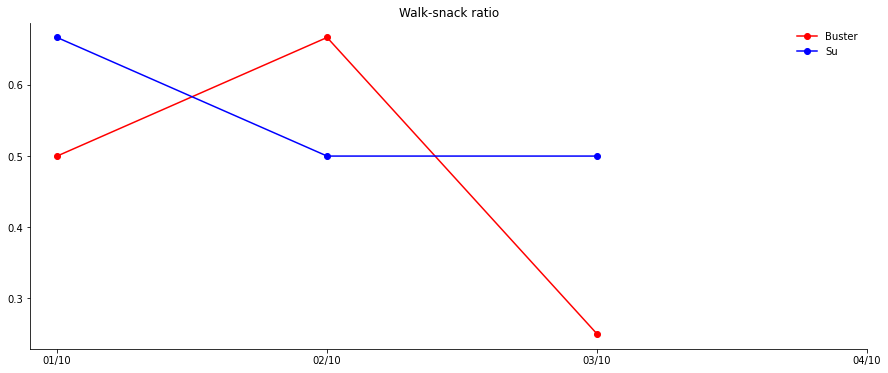

In [55]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15,6))

ax.plot(dogs_us.index, dogs_us[('Buster', 'ws_ratio')], color='red', marker = 'o', label='Buster')
ax.plot(dogs_us.index, dogs_us[('Su', 'ws_ratio')], color='blue', marker = 'o', label='Su')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Walk-snack ratio')
ax.legend(frameon=False)

# Here I am formatting the x-axis dates
ax.set_xticks(dogs_us.index)                                  # put ticks only where we have observations
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))   #show the month and day
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d/%m"))   #show the month and day

plt.show()

#ax.plot(dogs_us.index, dogs_us.xs('ws_ratio', level=1, axis=1))
#ax.legend(dogs_us.columns.get_level_values(level='dog').unique())

In [56]:
# Here is get_level_values
dogs_us.columns.get_level_values(level='dog')

Index(['Buster', 'Buster', 'Buster', 'Su', 'Su', 'Su'], dtype='object', name='dog')

### Pilha
Podemos **empilhar os dados** para colocar as variáveis de volta nas linhas.

Quando desempilhamos os dados, o padrão dos pandas é descartar os NaNs. Podemos substituir isso se quisermos. Se não passarmos um argumento, ele empilha o índice mais interno.

In [57]:
# stack just one level
dogs_s = dogs_us.stack()       # stack shifts the columns to rows. 
dogs_s

dog                    Buster        Su
time       var                         
2018-10-01 snacks    4.000000  3.000000
           walk      2.000000  2.000000
           ws_ratio  0.500000  0.666667
2018-10-02 snacks    3.000000  4.000000
           walk      2.000000  2.000000
           ws_ratio  0.666667  0.500000
2018-10-03 snacks    4.000000  4.000000
           walk      1.000000  2.000000
           ws_ratio  0.250000  0.500000
2018-10-04 snacks    5.000000  3.000000

In [ ]:
# stack two levels (and keep the missings)
dogs_s = dogs_us.stack(['dog', 'var'], dropna=False)
dogs_s

Os dados estão de volta ao formato 'longo'. Observe que agora temos séries e não um DataFrame.

Eu gostaria dog como o índice mais externo. Use o `swaplevel()` para trocar dois níveis.

In [ ]:
dogs_s=dogs_s.swaplevel('dog', 'time')
dogs_s

In [ ]:
# and swap var for time, so time is the innermost index
dogs_s=dogs_s.swaplevel('var', 'time')
dogs_s

In [ ]:
# and give it a sorting...
dogs_s.sort_index(inplace=True)
dogs_s

Vamos preparar isso para salvar dados longos, como quando os lemos.
1. Redefina o índice para movê-los de volta para as colunas
2. Dê um nome à coluna de valor

In [ ]:
dogs_s = dogs_s.reset_index()
dogs_s

In [ ]:
dogs_s.rename(columns={0 :'value'}, inplace=True)
dogs_s

In [ ]:
# Now save it. 
dogs_s.to_csv('dog_data_updated.csv', index=False)  #index = False does not print the index

### Praticando conceitos

Vamos revisar a multiIndexação com alguns dados do mundo real. Os dados estão confusos e exigirão alguma limpeza e 'disputa'. Nós vamos fazer um pouco juntos, então eu vou entregar para todos vocês terminarem.

Trabalharemos com o **World Economic Outlook** do FMI (https://www.imf.org/en/Publications/WEO/weo-database/2021/October), que contém dados históricos e as previsões do FMI para muitos países e variáveis.

Nosso **objetivo** é estudar a evolução da dívida na Alemanha, Argentina e Grécia.

Vamos gerar um arquivo XLS a partir dos dados publicados.

### Leia os dados em um DataFrame
Leia os dados e, em seguida, inspecione a cabeça e a cauda para ter certeza de que está conforme o esperado.

In [65]:
# The data are in a tab-separated list (even though the file ends in 'xls'. not cool, IMF)
# The thousands parameter tells pandas to remove the comma when reading in numbers
weo = pd.read_csv('/content/WEOOct2021all.csv', sep='\t', na_values=['n/a', '--'], thousands =',')
weo.head()


ParserError: ignored

### Um rápido aparte sobre codificação
O que aconteceu para termos um `UnicodeDecodeError`?

Qualquer caractere 'texto' (seja latino, cirílico, coreano, chinês,...) deve ser traduzido para uma série de 0s e 1s para que um computador o entenda. Essa tradução é conhecida como codificação. À medida que os computadores se desenvolveram, muitos grupos diferentes criaram muitas codificações diferentes (por exemplo, ASCII), de modo que a letra 'K' pode ser traduzida para 0010 em uma codificação e 00100101 em outra. Que bagunça.

Em algum momento, o [Unicode](https://en.wikipedia.org/wiki/Unicode) foi desenvolvido para servir como uma codificação padrão. O padrão do Pandas é a codificação utf-8. O mundo está convergindo para o unicode, mas outras codificação ainda estão por aí.

A mensagem de erro nos diz que o IMF não está codificando seu arquivo delimitado por tabulação como utf-8. Depois de pesquisar um pouco, descobri que o arquivo estava codificado em 'windows-1252'.

Isso é provavelmente mais do que você queria saber sobre texto, mas é um mundo assustador lá fora. Se você tentar ler um arquivo e o pandas gerar um erro unicode, provavelmente precisará alterar a codificação.

Os métodos `read_` de pandas (e outros métodos python) usam um parâmetro `encoding` para especificar a codificação do arquivo. Quando não especificamos a codificação, o padrão do pandas é utf-8. Vamos adicionar o parâmetro de codificação e tentar novamente.

In [66]:
# The data are in a tab-separated list (even though the file ends in 'xls'. not cool, IMF)
# The encoding parameter tells pandas how to read special characters
# The thousands parameter tells pandas to remove the comma when reading in numbers
weo = pd.read_csv('/content/WEOOct2021all.xlsx', sep='\t',  na_values=['n/a', '--'], thousands =',', encoding='windows-1252', skipfooter=3)
weo.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


UnicodeDecodeError: ignored

In [ ]:
weo.tail()

O arquivo de dados tem um rodapé com três linhas (volte e olhe no arquivo) e nós o lemos como uma linha de dados. Poderíamos voltar e especificar o parâmetro `skipfooter` para `read_csv()`, mas também podemos simplesmente descartá-lo.

In [ ]:
weo.drop(8820, inplace=True)
weo.drop(8821, inplace=True) 
weo.drop(8822, inplace=True) 
weo.tail()

### Elimine variáveis desnecessárias
Use `drop()` para se livrar das colunas que não vamos usar.

In [ ]:
weo.drop(['WEO Country Code', 'Subject Notes', 'Country/Series-specific Notes', 'Scale', 'Estimates Start After'],axis=1, inplace=True)
weo.head()

### Mantenha os países e variáveis que queremos
Vejamos Argentina, Alemanha e Grécia e as variáveis relação dívida-PIB e relação déficit-PIB.

In [ ]:
variables = ['GGXWDG_NGDP', 'GGXCNL_NGDP']
countries = ['ARG', 'DEU', 'GRC']

weo = weo[ weo['WEO Subject Code'].isin(variables) & weo['ISO'].isin(countries) ]
weo.head()

### O método isin()
Confira a forma que selecionamos as linhas do DataFrame que eu queria. Eu usei o método `isin()` ([docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isin.html)). Você passa uma lista de valores e ele retorna um DataFrame de booleanos que você usa para subconjunto dos dados. Isso é muito mais limpo do que usar um monte de instruções condicionais.

Estou usando duas vezes: uma vez para especificar as variáveis que quero e uma vez para especificar os países que quero. Eu junto os dois com um operador &.

Os dados estão em forma bastante decente. Reserve alguns minutos e tente o seguinte. Sinta-se à vontade para conversar com as pessoas ao redor se você ficar preso.

1. Renomeie o 'WEO Subject Code' para 'Variable' e 'Subject Descriptor' para 'Descriptor'.

In [ ]:
weo.rename(columns={'WEO Subject Code':'Variable', 'Subject Descriptor':'Description'}, inplace = True)
weo.head()

2. Modifique 'GGXCNL_NGDP' por 'Surplus'


3. Modifique 'GGXWDG_NGDP' por 'Debt'

In [ ]:
weo.loc[weo['Variable']=='GGXCNL_NGDP','Variable'] = 'Surplus' 
weo.loc[weo['Variable']=='GGXWDG_NGDP','Variable'] = 'Debt' 
weo.head()

4. Ajuste o multiIndex para 'ISO', 'Variable', 'Country', 'Description', e 'Units', nessa ordem.

In [ ]:
weo.set_index(['ISO', 'Variable', 'Country',  'Description', 'Units'], inplace=True)
weo.head()

5. Queremos que a linha seja o tempo e todo o resto sejam colunas. Troque as colunas por linhas usando o método 'transpose'.

6. Classifique os índices de linha e coluna.

In [ ]:
weo = weo.transpose()
weo.sort_index(axis=1, inplace=True)
weo.sort_index(axis=0, inplace=True)
printweo.head()

7. Plote os níveis de endividamento da Argentina, Alemanha e Grécia para todos os anos nos dados.

In [ ]:
weo.index = pd.to_datetime(weo.index)      # Set the index to be a datetime object
                                           # This allows matplotlib to treat the axis as time

fig, ax = plt.subplots(figsize=(10,6))

# Three different ways to index the data we want to plot:

# 1. Here I use a tuple for the multiIndex 
ax.plot(weo.index, weo[('ARG', 'Debt')], color='blue', label = 'Argentina')   

# 2. Here I do not use the tuple --- it works, too   
ax.plot(weo.index, weo['DEU', 'Debt'], color='red', label = 'Germany')  

# 3. Here I use .loc[rows, cols] and I need to use the tuple for call out the column 
ax.plot(weo.index, weo.loc[:,('GRC', 'Debt')], color='black', label = 'Greece')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Debt-GDP ratio')
ax.set_ylabel('share of gdp (%)')

ax.legend(frameon=False)

plt.show()

Uau, a Grécia teve uma corrida interessante. Vamos olhar para a Grécia mais de perto.
8. Crie uma grade (2,1) de subtramas. Plote o superávit da Grécia nos eixos superiores e a dívida no eixo inferior.

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(10,12))


ax[0].plot(weo.index, weo['GRC', 'Surplus'], color='red', label = 'Germany')
ax[0].set_title('Government surplus')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_ylabel('share of gdp (%)')
ax[0].axhline(y=0, color='black', linewidth=0.75)


ax[1].plot(weo.index, weo['GRC', 'Debt'], color='black', label = 'Greece')
ax[1].set_title('Government debt')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_ylabel('share of gdp (%)')

plt.show()